# Prawa gazowe dla gazu idealnego

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Wprowadzenie danych

In [2]:
# Dane z części pierwszej
czesc1_dane = np.array([
    [65, 100, 90, 30, 30],
    [60, 110, 100, 30, 30],
    [55, 120, 110, 30, 30],
    [50, 130, 120, 40, 40],
    [45, 150, 140, 40, 40],
    [40, 170, 160, 50, 50],
    [35, 190, 180, 60, 60],
    [30, 220, 210, 70, 70],
    [25, 270, 250, 80, 80],
    [20, 380, 380, 100, 100]
], dtype=int)

objetosc = czesc1_dane[:, 0]
cisnienie_mal_1 = czesc1_dane[:, 1]
cisnienie_mal_2 = czesc1_dane[:, 2]
cisnienie_ros_1 = czesc1_dane[:, 3]
cisnienie_ros_2 = czesc1_dane[:, 4]

# Dane z części drugiej
dane_ogrzewanie = np.array([
    [5, 0, 310],
    [6, 0, 312],
    [7, 0, 316],
    [8, 0, 319],
    [9, 0, 322],
    [10, 0, 325],
    [11, 0, 328],
    [12, 0, 332],
    [13, 0, 335],
    [14, 0, 338],
    [15, 0, 342]
], dtype=int)

dane_chlodzenie = np.array([
    [5, 0, 307],
    [6, 0, 310],
    [7, 0, 313],
    [8, 0, 316],
    [9, 0, 319],
    [10, 0, 322],
    [11, 0, 326],
    [12, 0, 329],
    [13, 0, 332],
    [14, 0, 335],
    [15, 0, 340]
], dtype=int)

delta_V = 1  # ml
delta_P_1 = 1e4  # Pa
delta_P_2 = 5e2  # Pa
delta_Ohm = 1  # Ohm

delta_P_1 = delta_P_1 / 1e3  # kPa
delta_P_2 = delta_P_2 / 1e3  # kPa

cisnienie_ogrzewanie = dane_ogrzewanie[:, 0]
opor_ogrzewanie = dane_ogrzewanie[:, 2]

cisnienie_chlodzenie = dane_chlodzenie[:, 0]
opor_chlodzenie = dane_chlodzenie[:, 2]

opor_ogrzewanie = opor_ogrzewanie / 10
opor_chlodzenie = opor_chlodzenie / 10

# Stałe fizyczne
R = 8.314  # J/(mol·K)

## Część Pierwsza

In [3]:
# Obliczenie wartości współczynników a i b prostej regresji liniowej

V_inv = 1 / objetosc
P_mal = np.mean([cisnienie_mal_1, cisnienie_mal_2], axis=0)
P_ros = np.mean([cisnienie_ros_1, cisnienie_ros_2], axis=0)

# Regresja liniowa dla danych malejących
A_mal = np.vstack([V_inv, np.ones(len(V_inv))]).T
a_mal, b_mal = np.linalg.lstsq(A_mal, P_mal, rcond=None)[0]

# Regresja liniowa dla danych rosnących
A_ros = np.vstack([V_inv, np.ones(len(V_inv))]).T
a_ros, b_ros = np.linalg.lstsq(A_ros, P_ros, rcond=None)[0]

print("Współczynniki regresji dla danych malejących:")
print(f"a_mal: {a_mal}, b_mal: {b_mal}")
print("Współczynniki regresji dla danych rosnących:")
print(f"a_ros: {a_ros}, b_ros: {b_ros}")

Współczynniki regresji dla danych malejących:
a_mal: 7735.8915346262165, b_mal: -29.37403963673794
Współczynniki regresji dla danych rosnących:
a_ros: 2128.34098886126, b_ros: -4.32901083066941


### Wykres dla danych malejących

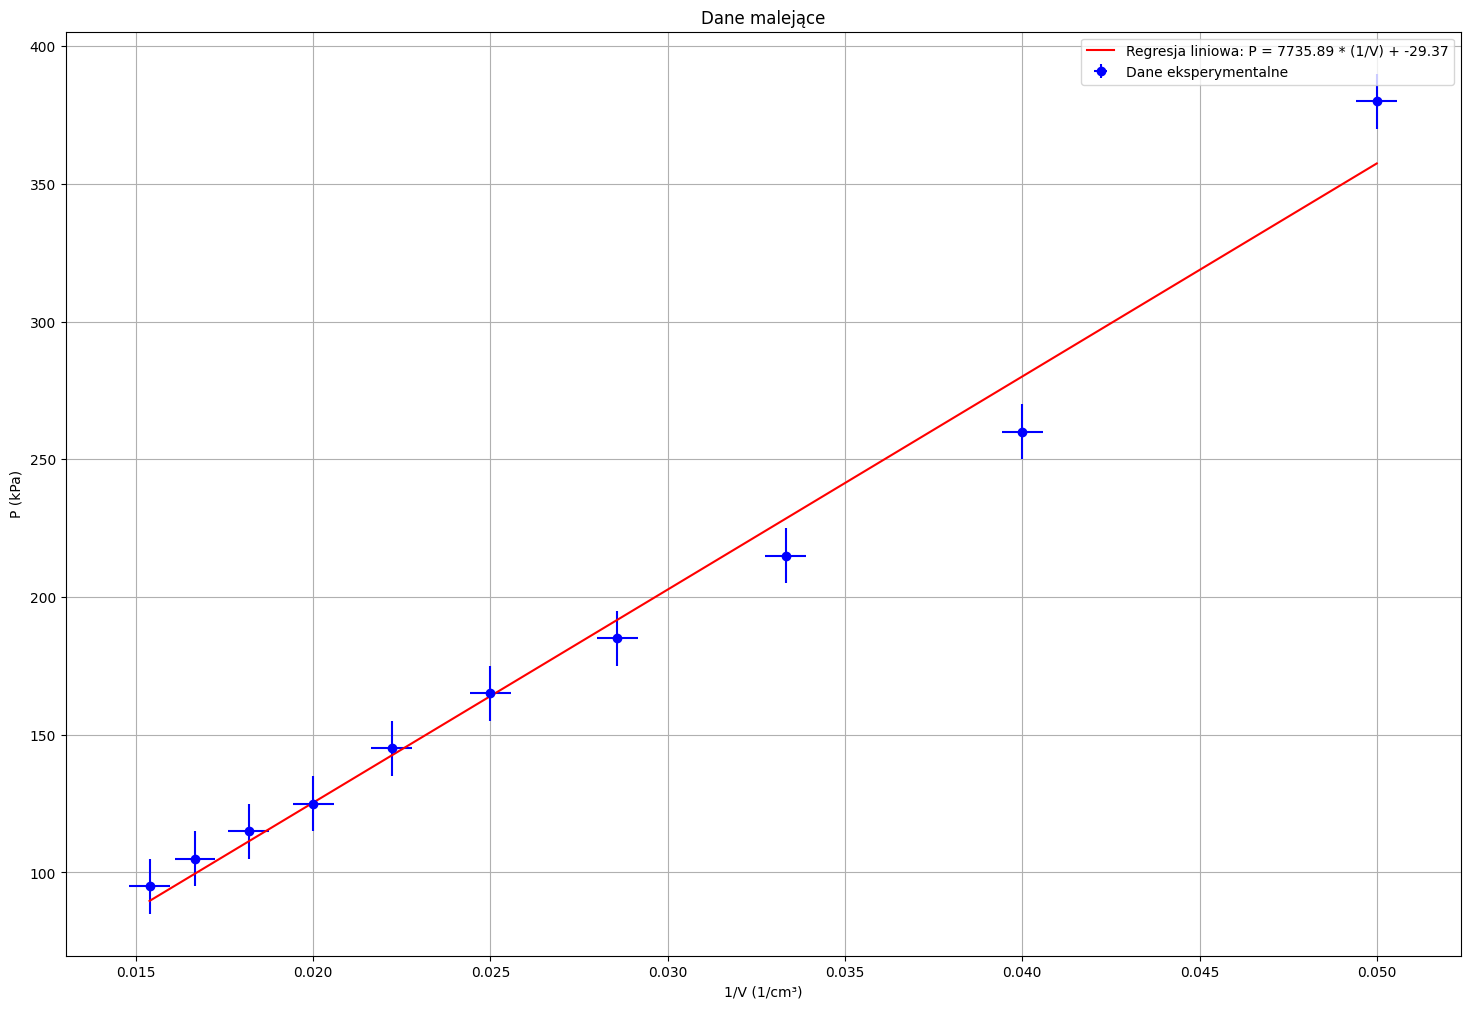

In [4]:
plt.figure(figsize=(18, 12))
plt.errorbar(V_inv, P_mal, yerr=delta_P_1, xerr=(delta_V/np.sqrt(3))/1000, fmt='o', color='blue', label='Dane eksperymentalne')
plt.plot(V_inv, a_mal * V_inv + b_mal, color='red', label=f"Regresja liniowa: P = {a_mal:.2f} * (1/V) + {b_mal:.2f}")
plt.xlabel('1/V (1/cm³)')
plt.ylabel('P (kPa)')
plt.title('Dane malejące')
plt.legend()
plt.grid()
plt.show()

### Wykres dla danych rosnących

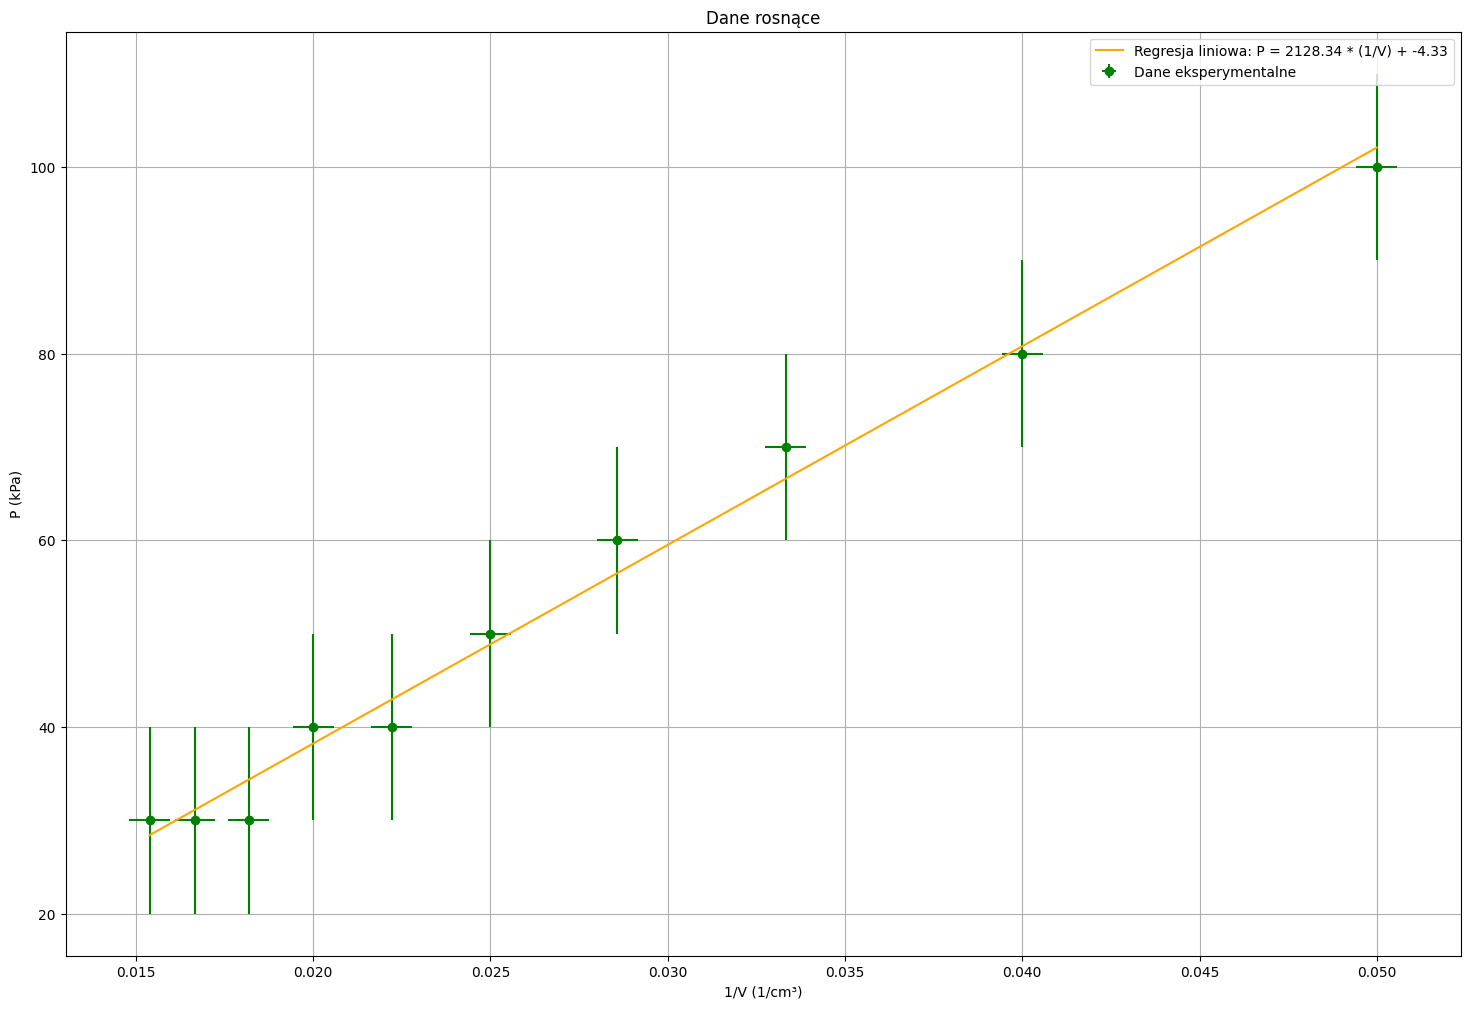

In [5]:
plt.figure(figsize=(18, 12))

plt.errorbar(V_inv, P_ros, yerr=delta_P_1, xerr=(delta_V/np.sqrt(3))/1000, fmt='o', color='green', label='Dane eksperymentalne')
plt.plot(V_inv, a_ros * V_inv + b_ros, color='orange', label=f"Regresja liniowa: P = {a_ros:.2f} * (1/V) + {b_ros:.2f}")
plt.xlabel('1/V (1/cm³)')
plt.ylabel('P (kPa)')
plt.title('Dane rosnące')
plt.legend()
plt.grid()
plt.show()

## Część Druga

In [6]:
# Obliczenie temperatury na podstawie oporu z prostej regresji zależności R(T)
# y = 0.1178x+26.052
def oblicz_temperature(opor):
    return (opor - 26.052) / 0.1178

T_ogrzewanie = oblicz_temperature(opor_ogrzewanie)
T_chlodzenie = oblicz_temperature(opor_chlodzenie)

print("Temperatury dla danych ogrzewania (°C):")
print(T_ogrzewanie)
print("Temperatury dla danych chłodzenia (°C):")
print(T_chlodzenie)

# Przeliczenie temperatury na Kelviny
T_ogrzewanie += 273.15
T_chlodzenie += 273.15

# Obliczenie wartości współczynników a i b prostej regresji liniowej dla obu zestawów danych
# Regresja liniowa dla danych ogrzewania
A_ogrzewanie = np.vstack([T_ogrzewanie, np.ones(len(T_ogrzewanie))]).T
a_ogrzewanie, b_ogrzewanie = np.linalg.lstsq(A_ogrzewanie, cisnienie_ogrzewanie, rcond=None)[0]

# Regresja liniowa dla danych chłodzenia
A_chlodzenie = np.vstack([T_chlodzenie, np.ones(len(T_chlodzenie))]).T
a_chlodzenie, b_chlodzenie = np.linalg.lstsq(A_chlodzenie, cisnienie_chlodzenie, rcond=None)[0]

print("Współczynniki regresji dla danych ogrzewania:")
print(f"a_ogrzewanie: {a_ogrzewanie}, b_ogrzewanie: {b_ogrzewanie}")
print("Współczynniki regresji dla danych chłodzenia:")
print(f"a_chlodzenie: {a_chlodzenie}, b_chlodzenie: {b_chlodzenie}")


Temperatury dla danych ogrzewania (°C):
[42.00339559 43.70118846 47.09677419 49.6434635  52.1901528  54.73684211
 57.28353141 60.67911715 63.22580645 65.77249576 69.16808149]
Temperatury dla danych chłodzenia (°C):
[39.45670628 42.00339559 44.55008489 47.09677419 49.6434635  52.1901528
 55.58573854 58.13242784 60.67911715 63.22580645 67.47028862]
Współczynniki regresji dla danych ogrzewania:
a_ogrzewanie: 0.3665203525641025, b_ogrzewanie: -110.29034199519224
Współczynniki regresji dla danych chłodzenia:
a_chlodzenie: 0.3641040050656974, b_chlodzenie: -108.65434411112925


### Wykres dla danych ogrzewania

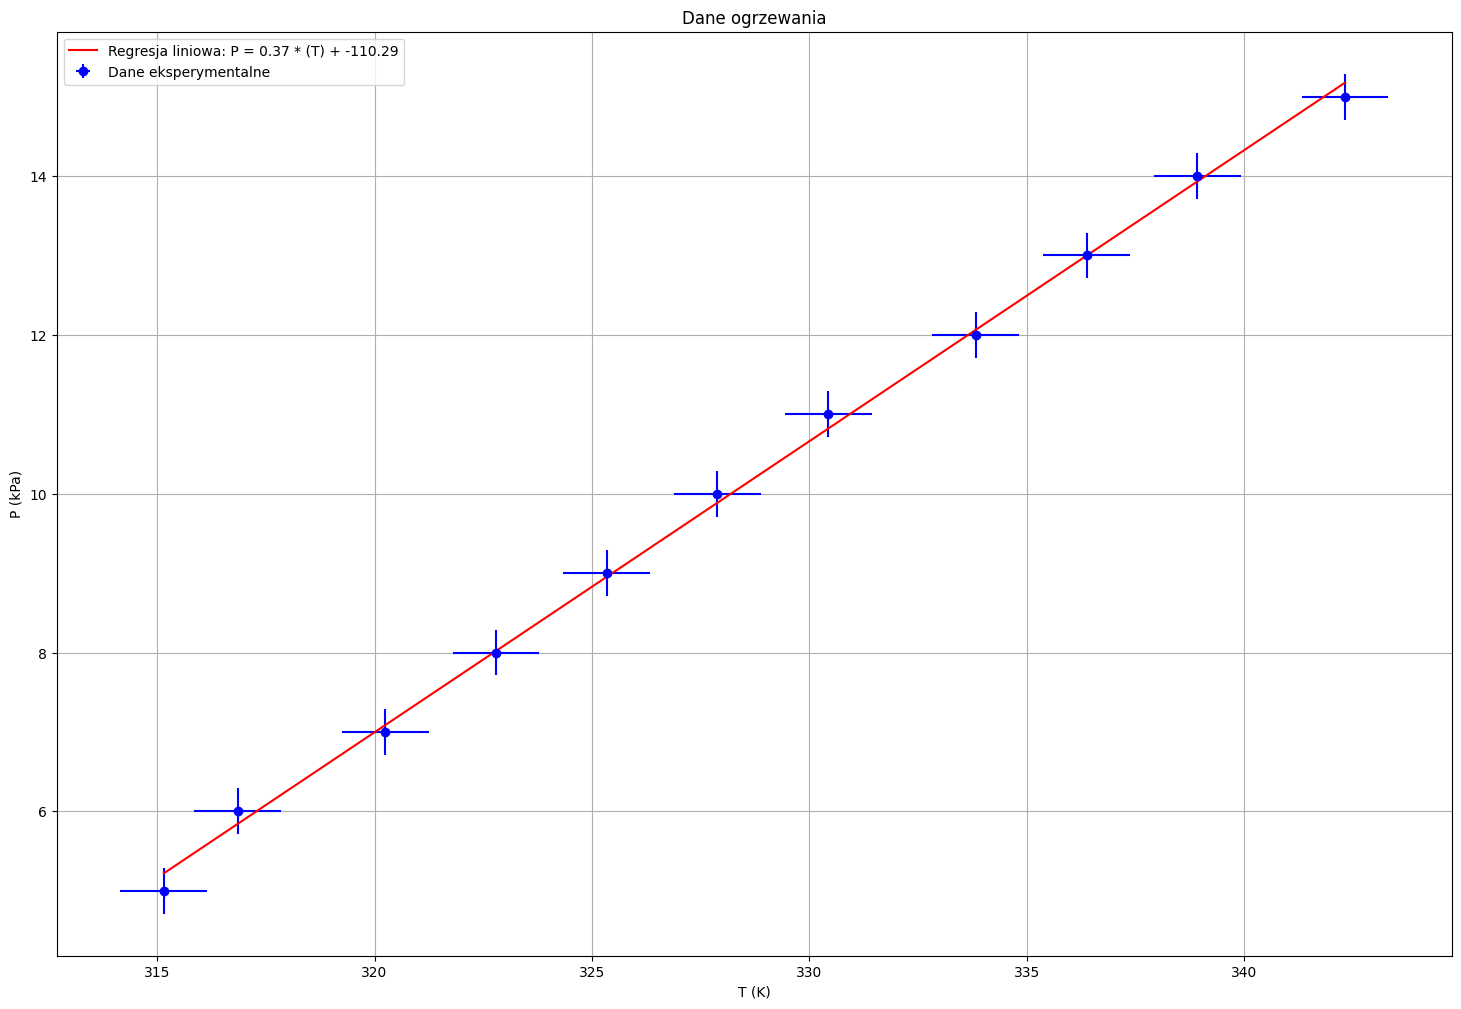

In [7]:
plt.figure(figsize=(18, 12))
plt.errorbar(T_ogrzewanie, cisnienie_ogrzewanie, yerr=delta_P_2/(3**0.5), xerr=delta_Ohm, fmt='o', color='blue', label='Dane eksperymentalne')
plt.plot(T_ogrzewanie, a_ogrzewanie * (T_ogrzewanie) + b_ogrzewanie, color='red', label=f"Regresja liniowa: P = {a_ogrzewanie:.2f} * (T) + {b_ogrzewanie:.2f}")
plt.xlabel('T (K)')
plt.ylabel('P (kPa)')
plt.title('Dane ogrzewania')
plt.legend()
plt.grid()
plt.show()

### Wykres dla danych chłodzenia

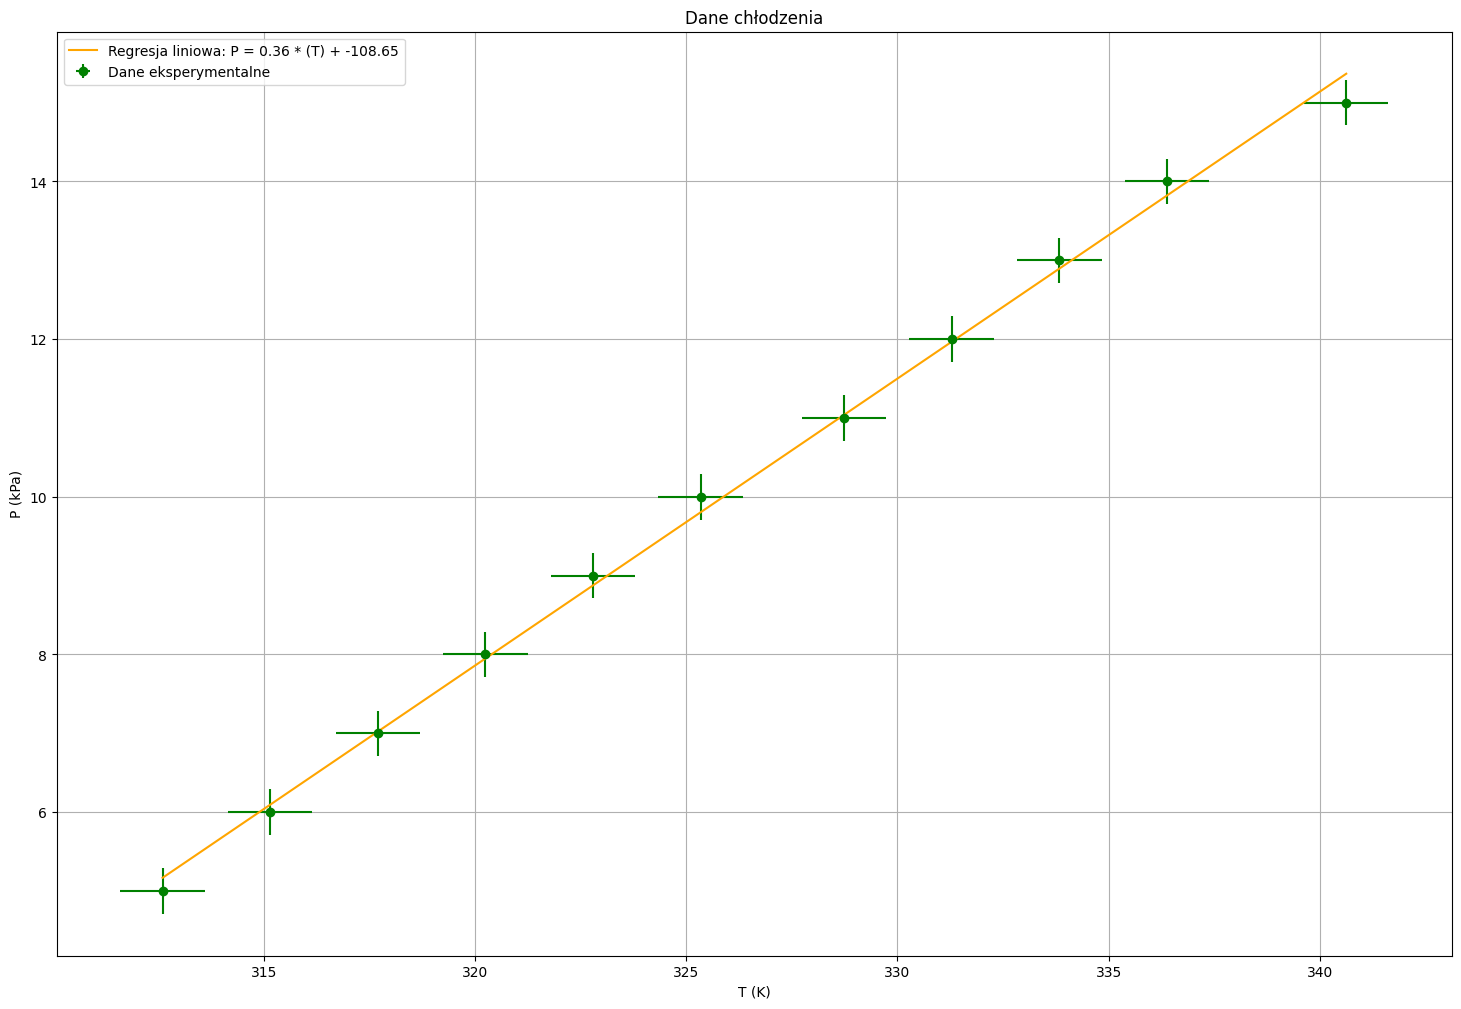

In [8]:
plt.figure(figsize=(18, 12))
plt.errorbar(T_chlodzenie, cisnienie_chlodzenie, yerr=delta_P_2/(3**0.5), xerr=delta_Ohm, fmt='o', color='green', label='Dane eksperymentalne')
plt.plot(T_chlodzenie, a_chlodzenie * (T_chlodzenie) + b_chlodzenie, color='orange', label=f"Regresja liniowa: P = {a_chlodzenie:.2f} * (T) + {b_chlodzenie:.2f}")
plt.xlabel('T (K)')
plt.ylabel('P (kPa)')
plt.title('Dane chłodzenia')
plt.legend()
plt.grid()
plt.show()

### Wykres dla danych uśrednionych

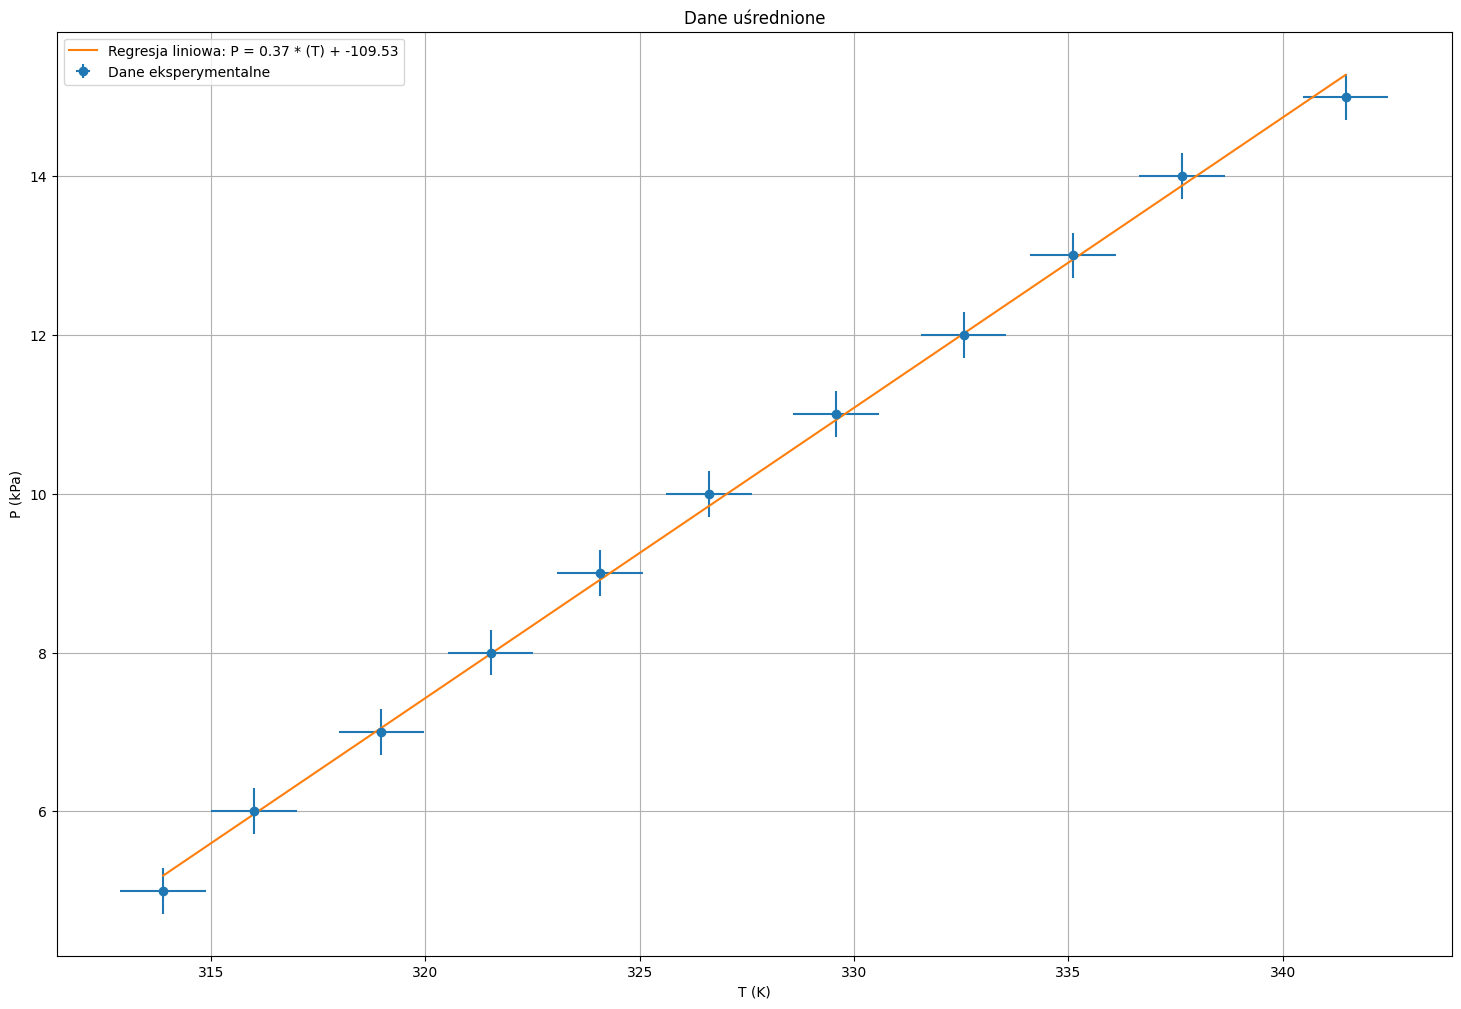

In [9]:
plt.figure(figsize=(18, 12))
T_srednia = (T_ogrzewanie + T_chlodzenie) / 2
P_srednia = (cisnienie_ogrzewanie + cisnienie_chlodzenie) / 2
plt.errorbar(T_srednia, P_srednia, yerr=delta_P_2/(3**0.5), xerr=delta_Ohm, fmt='o', label='Dane eksperymentalne')
A_srednia = np.vstack([T_srednia, np.ones(len(T_srednia))]).T
a_srednia, b_srednia = np.linalg.lstsq(A_srednia, P_srednia, rcond=None)[0]
plt.plot(T_srednia, a_srednia * (T_srednia) + b_srednia, label=f"Regresja liniowa: P = {a_srednia:.2f} * (T) + {b_srednia:.2f}")
plt.xlabel('T (K)')
plt.ylabel('P (kPa)')
plt.title('Dane uśrednione')
plt.legend()
plt.grid()
plt.show()

## Niepewność pomiarowa

In [10]:
# Niepewność pomiarowa dla danych pierwszej części
delta_P = 0.1 # kPa
delta_V = 1   # ml
delta_T = 0.1   # °C
# Niepewność współczynników regresji liniowej
# Dla danych malejących
n_mal = len(V_inv)
y_fit_mal = a_mal * V_inv + b_mal
residuals_mal = P_mal - y_fit_mal
s_err_mal = np.sqrt(np.sum(residuals_mal**2) / (n_mal - 2))
x_mean_mal = np.mean(V_inv)
S_xx_mal = np.sum((V_inv - x_mean_mal)**2)
delta_a_mal = s_err_mal / np.sqrt(S_xx_mal)
delta_b_mal = s_err_mal * np.sqrt(np.sum(V_inv**2) / (n_mal * S_xx_mal))

print("Niepewności współczynników regresji dla danych malejących:")
print(f"delta_a_mal: {delta_a_mal}, delta_b_mal: {delta_b_mal}")
print(f"S_y dla danych malejących: {s_err_mal}")

# Dla danych rosnących
n_ros = len(V_inv)
y_fit_ros = a_ros * V_inv + b_ros
residuals_ros = P_ros - y_fit_ros
s_err_ros = np.sqrt(np.sum(residuals_ros**2) / (n_ros - 2))
x_mean_ros = np.mean(V_inv)
S_xx_ros = np.sum((V_inv - x_mean_ros)**2)
delta_a_ros = s_err_ros / np.sqrt(S_xx_ros)
delta_b_ros = s_err_ros * np.sqrt(np.sum(V_inv**2) / (n_ros * S_xx_ros))
print("Niepewności współczynników regresji dla danych rosnących:")
print(f"delta_a_ros: {delta_a_ros}, delta_b_ros: {delta_b_ros}")
print(f"S_y dla danych rosnących: {s_err_ros}")

# Niepewność współczynników regresji liniowej dla danych drugiej części
# Dla danych ogrzewania
n_ogrzewanie = len(T_ogrzewanie)
y_fit_ogrzewanie = a_ogrzewanie * T_ogrzewanie + b_ogrzewanie
residuals_ogrzewanie = cisnienie_ogrzewanie - y_fit_ogrzewanie
s_err_ogrzewanie = np.sqrt(np.sum(residuals_ogrzewanie**2) / (n_ogrzewanie - 2))
x_mean_ogrzewanie = np.mean(T_ogrzewanie)
S_xx_ogrzewanie = np.sum((T_ogrzewanie - x_mean_ogrzewanie)**2)
delta_a_ogrzewanie = s_err_ogrzewanie / np.sqrt(S_xx_ogrzewanie)
delta_b_ogrzewanie = s_err_ogrzewanie * np.sqrt(np.sum(T_ogrzewanie**2) / (n_ogrzewanie * S_xx_ogrzewanie))
print("Niepewności współczynników regresji dla danych ogrzewania:")
print(f"delta_a_ogrzewanie: {delta_a_ogrzewanie}, delta_b_ogrzewanie: {delta_b_ogrzewanie}")
print(f"S_y dla danych ogrzewania: {s_err_ogrzewanie}")

Niepewności współczynników regresji dla danych malejących:
delta_a_mal: 366.0973988993185, delta_b_mal: 10.605019242781207
S_y dla danych malejących: 12.338199190092299
Niepewności współczynników regresji dla danych rosnących:
delta_a_ros: 84.52149433012771, delta_b_ros: 2.4483978211659885
S_y dla danych rosnących: 2.848539858586015
Niepewności współczynników regresji dla danych ogrzewania:
delta_a_ogrzewanie: 0.004783203070132016, delta_b_ogrzewanie: 1.57036740163974
S_y dla danych ogrzewania: 0.13676799453996658


In [11]:
#odchylenia standardowe
odchylenia_standardowe_mal = [
    np.std([cisnienie_mal_1[i], cisnienie_mal_2[i]], ddof=1)
    for i in range(len(cisnienie_mal_1))
]
odchylenia_standardowe_ros = [
    np.std([cisnienie_ros_1[i], cisnienie_ros_2[i]], ddof=1)
    for i in range(len(cisnienie_ros_1))
]
odchylenia_standardowe_czesc2 = [
    np.std([opor_ogrzewanie[i], opor_chlodzenie[i]], dtype=np.float128, ddof=1)
    for i in range(len(cisnienie_ogrzewanie))
]
print("Odchylenia standardowe dla danych malejących:")
print(odchylenia_standardowe_mal)
print("Odchylenia standardowe dla danych rosnących:")
print(odchylenia_standardowe_ros)
print("Odchylenia standardowe dla danych części drugiej:")
print(odchylenia_standardowe_czesc2)

Odchylenia standardowe dla danych malejących:
[np.float64(7.0710678118654755), np.float64(7.0710678118654755), np.float64(7.0710678118654755), np.float64(7.0710678118654755), np.float64(7.0710678118654755), np.float64(7.0710678118654755), np.float64(7.0710678118654755), np.float64(7.0710678118654755), np.float64(14.142135623730951), np.float64(0.0)]
Odchylenia standardowe dla danych rosnących:
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Odchylenia standardowe dla danych części drugiej:
[np.longdouble('0.21213203435596475976'), np.longdouble('0.14142135623730900245'), np.longdouble('0.21213203435596475976'), np.longdouble('0.2121320343559622476'), np.longdouble('0.21213203435596727189'), np.longdouble('0.2121320343559622476'), np.longdouble('0.1414213562373064903'), np.longdouble('0.21213203435596727189'), np.longdouble('0.2121320343559622476'), np.longdouble('0